In [3]:
import random as rd

Variant = 4
rd.seed(Variant)

Numbers_of_problems = [i+1 for i in rd.sample(range(11),2)]
Numbers_of_problems

[4, 5]

Задание 4

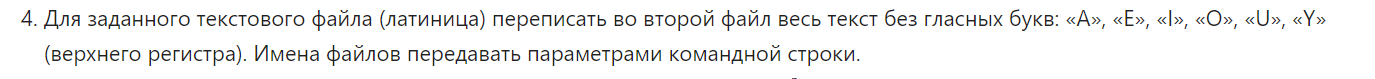

func.asm

In [ ]:
;;My library of useful functions named func.asm

;Function exit
exit:
     mov rax, 60
     mov rdi, 0
     syscall

;Function printing of string
;input rsi - place of memory of begin string
print_str:
    push rax
    push rdi
    push rdx
    push rcx
    mov rax, rsi
    call len_str
    mov rdx, rax
    mov rax, 1
    mov rdi, 1
    syscall
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;The function makes new line
new_line:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, 0xA
   push rax
   mov rdi, 1
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret


;The function finds the length of a string
;input rax - place of memory of begin string
;output rax - length of the string
len_str:
  push rdx
  mov rdx, rax
  .iter:
      cmp byte [rax], 0
      je .next
      inc rax
      jmp .iter
  .next:
     sub rax, rdx
     pop rdx
     ret


;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
str_number:
    push rcx
    push rbx

    xor rax,rax
    xor rcx,rcx
.loop:
    xor     rbx, rbx
    mov     bl, byte [rsi+rcx]
    cmp     bl, 48
    jl      .finished
    cmp     bl, 57
    jg      .finished

    sub     bl, 48
    add     rax, rbx
    mov     rbx, 10
    mul     rbx
    inc     rcx
    jmp     .loop

.finished:
    cmp     rcx, 0
    je      .restore
    mov     rbx, 10
    div     rbx

.restore:
    pop rbx
    pop rcx
    ret

;The function converts the nubmer to string
;input rax - number
;rsi -address of begin of string
number_str:
  push rbx
  push rcx
  push rdx
  xor rcx, rcx
  mov rbx, 10
  .loop_1:
    xor rdx, rdx
    div rbx
    add rdx, 48
    push rdx
    inc rcx
    cmp rax, 0
    jne .loop_1
  xor rdx, rdx
  .loop_2:
    pop rax
    mov byte [rsi+rdx], al
    inc rdx
    dec rcx
    cmp rcx, 0
  jne .loop_2
  mov byte [rsi+rdx], 0   
  pop rdx
  pop rcx
  pop rbx
  ret


;The function realizates user input from the keyboard
;input: rsi - place of memory saved input string 
input_keyboard:
  push rax
  push rdi
  push rdx

  mov rax, 0
  mov rdi, 0
  mov rdx, 255
  syscall

  xor rcx, rcx
  .loop:
     mov al, [rsi+rcx]
     inc rcx
     cmp rax, 0x0A
     jne .loop
  dec rcx
  mov byte [rsi+rcx], 0
  
  pop rdx
  pop rdi
  pop rax
  ret

main.asm

In [ ]:
format elf64
public _start

include 'func.asm'

section '.data' writable

buffer rb 101

section '.text' executable

_start:
   pop rcx ;читаем количество параметров командной строки
   cmp rcx, 3 ;если один параметр(имя исполняемого файла)
   jne .l1 ;завершаем работу

   mov rdi,[rsp+8] ;загружаем адрес имени файла из стека
   mov rax, 2 ;системный вызов открытия файла
   mov rsi, 0o ;Права только на чтение
   syscall
   cmp rax, 0 ;если вернулось отрицательное значение,
   jl .l1 ;то произошла ошибка открытия файла, также завершаем работу
   
   mov r8, rax ;сохраняем файловый дескриптор

   ; Получаем имя выходного файла
  ; mov rdi,[rsp+16] 
  ; mov rax, 2 
  ; ;;Формируем O_WRONLY|O_TRUNC|O_CREAT
  ; mov rsi, 577
  ; mov rdx, 777o
  ; syscall 
  ; cmp rax, 0 
  ;    jl .l1
  ; mov r9, rax         ; Сохраняем дескриптор выходного файла
   
.loop_read: ;начинаем цикл чтения из файла
   mov rax, 0            ; Номер системного вызова для чтения
   mov rdi, r8           ; Файловый дескриптор
   mov rsi, buffer       ; Буфер для хранения прочитанного символа
   mov rdx, 1            ; Читаем 1 байт
   syscall               ; Выполняем системный вызов read
   cmp rax, 0            ; Проверяем, прочитали ли 0 байт (EOF)
   je .next              ; Если да, выходим из цикла
   cmp byte [buffer], 'A'
   je .loop_read
   cmp byte [buffer], 'E'
   je .loop_read
   cmp byte [buffer], 'I'
   je .loop_read
   cmp byte [buffer], 'O'
   je .loop_read
   cmp byte [buffer], 'U'
   je .loop_read
   cmp byte [buffer], 'Y'
   je .loop_read


    mov rdi, r9         ; Дескриптор выходного файла
   mov rax, 1          ; Системный вызов для записи
   mov rsi, buffer     ; Буфер с символом
   mov rdx, 1          ; Записываем 1 байт
   syscall
   
   jmp .loop_read        ; Продолжаем чтение
 
.next:   ;;Системный вызов close
   mov rdi, r8
   mov rax, 3
   syscall
   
.l1:
   call exit

input.txt

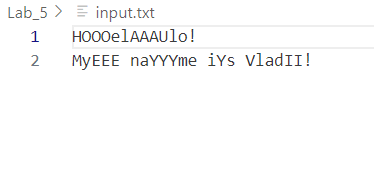

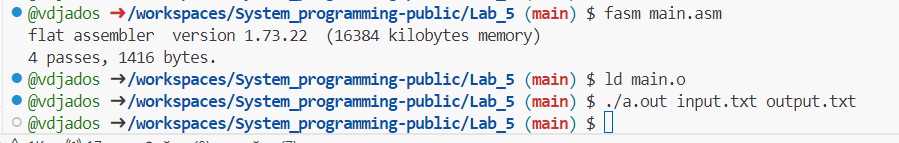

Output.txt

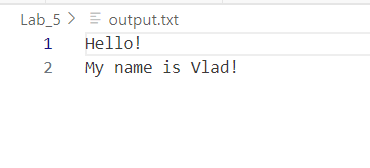

Задание 5

main2.asm

In [ ]:
format elf64
public _start

include 'func.asm'

section '.data' writable

buffer rb 101

section '.text' executable

_start:
   pop rcx ;читаем количество параметров командной строки
   cmp rcx, 5 ;если один параметр(имя исполняемого файла)
   jne .l1 ;завершаем работу

   mov rdi,[rsp+8] ;загружаем адрес имени файла из стека
   mov rax, 2 ;системный вызов открытия файла
   mov rsi, 0o ;Права только на чтение
   syscall
   cmp rax, 0 ;если вернулось отрицательное значение,
   jl .l1 ;то произошла ошибка открытия файла, также завершаем работу
   
   mov r8, rax ;сохраняем файловый дескриптор

    
   mov rdi,[rsp+16] 
   mov rax, 2 
   ;;Формируем O_WRONLY|O_TRUNC|O_CREAT
   mov rsi, 577
   mov rdx, 777o
   syscall 
   cmp rax, 0 
      jl .l1
   mov r9, rax         ; Сохраняем дескриптор выходного файла

  mov rsi, [rsp+24]
  call str_number
  mov r10, rax

  mov rsi, [rsp+32]
  call str_number
  mov r11, rax

    sub r10, r11             ; n - k
    mov r12, r10             ; сохраняем n-k в r12
    add r10, r11             ; n + k

.loop_read: ;начинаем цикл чтения из файла
   mov rax, 0            ; Номер системного вызова для чтения
   mov rdi, r8           ; Файловый дескриптор
   mov rsi, buffer       ; Буфер для хранения прочитанного символа
   mov rdx, 100         ; Читаем 100 байт
   syscall               ; Выполняем системный вызов read
   cmp rax, 0            ; Проверяем, прочитали ли 0 байт (EOF)
   je .next              ; Если да, выходим из цикла

   ; Печатаем символы от n до n-k
    mov rbx, rax            ; сохраняем количество прочитанных байт в rbx
    lea r13, [buffer + r10] ; устанавливаем указатель на n
    lea r14, [buffer + r10] ; устанавливаем указатель на n
    mov rdi, r9
.print_loop:

    cmp r12, r10            ; сравниваем с n
    jg .next               ; если n-k > n, выходим
    cmp r13, r14
    je .skip
    mov rax, 1              ; системный вызов для записи
    mov rsi, r13            ; буфер с символом
    mov rdx, 1              ; записываем 1 байт
    syscall
    .skip:
    mov rax, 1              ; системный вызов для записи
    mov rsi, r14            ; буфер с символом
    mov rdx, 1              ; записываем 1 байт
    syscall

    dec r10                  ; уменьшаем указатель
    inc r14
    dec r13                  ; переходим к предыдущему символу
    jmp .print_loop         ; продолжаем печать

   jmp .loop_read        ; Продолжаем чтение
 
.next:   ;;Системный вызов close
   mov rdi, r8
   mov rax, 3
   syscall
   
.l1:
   call exit

input2.txt

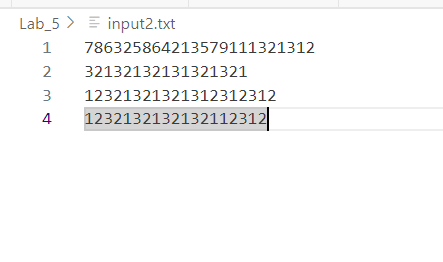

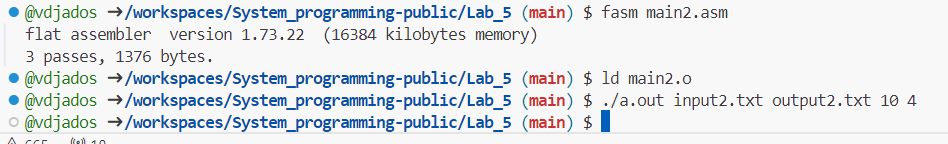

output2.txt

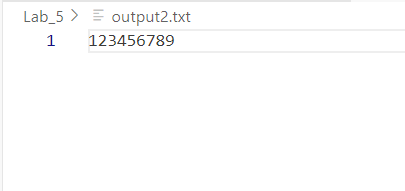